# ST2195 Coursework

#### Student Number : 210421794

## Question 1 : When is the best time of day, day of the week, and time of year to fly to minimise delays?

In [1]:
# Import and load necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import patches as mpatches

In [2]:
# Load the datasets

flight2005 = pd.read_csv("/Users/jessicalawrence/Desktop/ST2195 Coursework Project/2005.csv")
flight2006 = pd.read_csv("/Users/jessicalawrence/Desktop/ST2195 Coursework Project/2006.csv")

airports = pd.read_csv("/Users/jessicalawrence/Desktop/ST2195 Coursework Project/airports.csv")
carriers = pd.read_csv("/Users/jessicalawrence/Desktop/ST2195 Coursework Project/carriers.csv")
plane_data = pd.read_csv("/Users/jessicalawrence/Desktop/ST2195 Coursework Project/plane-data.csv")

In [3]:
# Combine the data from 2005 and 2006

flights = pd.concat([flight2005, flight2006])
flights

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,4,23,0,NaN,0,0,0,0,0,0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,6,15,0,NaN,0,0,0,0,0,0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,9,18,0,NaN,0,0,0,0,0,0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,11,10,0,NaN,0,0,0,0,0,0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5,10,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141917,2006,12,29,5,1246.0,1249,1452.0,1459,DL,1675,...,6,12,0,NaN,0,0,0,0,0,0
7141918,2006,12,29,5,1225.0,1155,2033.0,1931,DL,1676,...,12,35,0,NaN,0,30,0,32,0,0
7141919,2006,12,29,5,2118.0,2115,2254.0,2241,DL,1676,...,9,27,0,NaN,0,0,0,0,0,0
7141920,2006,12,29,5,2122.0,2127,2209.0,2223,DL,1677,...,5,21,0,NaN,0,0,0,0,0,0


In [4]:
# Look at the summary of the flights dataset

flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14282518 entries, 0 to 7141921
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay     

In [5]:
# Check for any missing values

flights.isnull().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                255664
CRSDepTime                  0
ArrTime                285878
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                     0
ActualElapsedTime      285878
CRSElapsedTime              4
AirTime                285878
ArrDelay               285878
DepDelay               255664
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     14026853
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
dtype: int64

In [6]:
# Remove rows with missing values

flights.dropna(subset = ['DepTime', 'ArrTime', 'ArrDelay', 'DepDelay'], inplace = True)

In [7]:
# Re-check the null values

flights.isnull().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                     0
CRSDepTime                  0
ArrTime                     0
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                     0
ActualElapsedTime           0
CRSElapsedTime              0
AirTime                     0
ArrDelay                    0
DepDelay                    0
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     13996639
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
dtype: int64

### Best Time of Day

In [8]:
# Create a new column called deptime_interval

time_interval = [(0, 200), (200, 400), (400, 600), (600, 800), (800, 1000), 
                (1000, 1200), (1200, 1400), (1400, 1600), (1600, 1800), 
                (1800, 2000), (2000, 2200), (2200, 2400)]

conditions = []
for lower, upper in time_interval:
    condition = (flights['CRSDepTime'] >= lower) & (flights['CRSDepTime'] < upper)
    conditions.append(condition)
    
hours = ['00.00 - 01.59', '02.00 - 03.59', '04.00 - 05.59', '06.00 - 07.59', '08.00 - 09.59', '10.00 - 11.59', 
          '12.00 - 13.59', '14.00 - 15.59', '16.00 - 17.59', '18.00 - 19.59', '20.00 - 21.59', '22.00 - 23.59']

flights['deptime_interval'] = np.select(conditions, hours)
flights

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,deptime_interval
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,23,0,NaN,0,0,0,0,0,0,16.00 - 17.59
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,15,0,NaN,0,0,0,0,0,0,16.00 - 17.59
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,18,0,NaN,0,0,0,0,0,0,16.00 - 17.59
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,10,0,NaN,0,0,0,0,0,0,16.00 - 17.59
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,10,0,NaN,0,0,0,0,0,0,18.00 - 19.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141917,2006,12,29,5,1246.0,1249,1452.0,1459,DL,1675,...,12,0,NaN,0,0,0,0,0,0,12.00 - 13.59
7141918,2006,12,29,5,1225.0,1155,2033.0,1931,DL,1676,...,35,0,NaN,0,30,0,32,0,0,10.00 - 11.59
7141919,2006,12,29,5,2118.0,2115,2254.0,2241,DL,1676,...,27,0,NaN,0,0,0,0,0,0,20.00 - 21.59
7141920,2006,12,29,5,2122.0,2127,2209.0,2223,DL,1677,...,21,0,NaN,0,0,0,0,0,0,20.00 - 21.59


In [9]:
# Analyzing the percentage number of delayed flights per 2 hours time interval in a day

best_time_of_day_count = flights.groupby("deptime_interval").agg(
    delayed_flights=("ArrDelay", lambda x: (x > 0).sum()),  # count number of delayed flights i.e. ArrDelay>0
    total_flights=("ArrDelay", "count")  # count total number of flights
)
best_time_of_day_count["percentage_of_delayed_flights"] = (best_time_of_day_count["delayed_flights"] / best_time_of_day_count["total_flights"]) * 100
best_time_of_day_count = best_time_of_day_count.rename(columns={"percentage_of_delayed_flights": "% of delayed flights"})
best_time_of_day_count

,delayed_flights,total_flights,% of delayed flights
deptime_interval,,,
00.00 - 01.59,11607,28873,40.200187
02.00 - 03.59,1081,2591,41.721343
04.00 - 05.59,28849,100299,28.762999
06.00 - 07.59,621544,1865419,33.319270
08.00 - 09.59,731411,1893845,38.620426
10.00 - 11.59,752226,1793002,41.953439
12.00 - 13.59,798244,1786187,44.689834
14.00 - 15.59,852449,1750545,48.696206
16.00 - 17.59,940994,1828644,51.458567


In [10]:
# Analyzing the average of delay per deptime_interval

best_time_of_day_mean = flights[flights["ArrDelay"] > 0].groupby("deptime_interval").agg({"ArrDelay" : "mean"}).reset_index()
best_time_of_day_mean = best_time_of_day_mean.rename(columns={"ArrDelay" : 'average arrdelay'})
best_time_of_day_mean

,deptime_interval,average arrdelay
0,00.00 - 01.59,23.703713
1,02.00 - 03.59,28.121184
2,04.00 - 05.59,20.702797
3,06.00 - 07.59,20.202830
4,08.00 - 09.59,22.146484
5,10.00 - 11.59,23.851989
6,12.00 - 13.59,27.381247
7,14.00 - 15.59,31.089029
8,16.00 - 17.59,35.310619
9,18.00 - 19.59,37.377223


In [11]:
# Combine two DataFrames

best_time_of_day = pd.merge(best_time_of_day_count, best_time_of_day_mean, on="deptime_interval")
best_time_of_day.columns = ['Time Interval', 'Total Delayed Flights', 'Total Flights', '% of Delayed Flights', 'Average Arrival Delay']
best_time_of_day

,Time Interval,Total Delayed Flights,Total Flights,% of Delayed Flights,Average Arrival Delay
0,00.00 - 01.59,11607,28873,40.200187,23.703713
1,02.00 - 03.59,1081,2591,41.721343,28.121184
2,04.00 - 05.59,28849,100299,28.762999,20.702797
3,06.00 - 07.59,621544,1865419,33.319270,20.202830
4,08.00 - 09.59,731411,1893845,38.620426,22.146484
5,10.00 - 11.59,752226,1793002,41.953439,23.851989
6,12.00 - 13.59,798244,1786187,44.689834,27.381247
7,14.00 - 15.59,852449,1750545,48.696206,31.089029
8,16.00 - 17.59,940994,1828644,51.458567,35.310619
9,18.00 - 19.59,863091,1651825,52.250753,37.377223


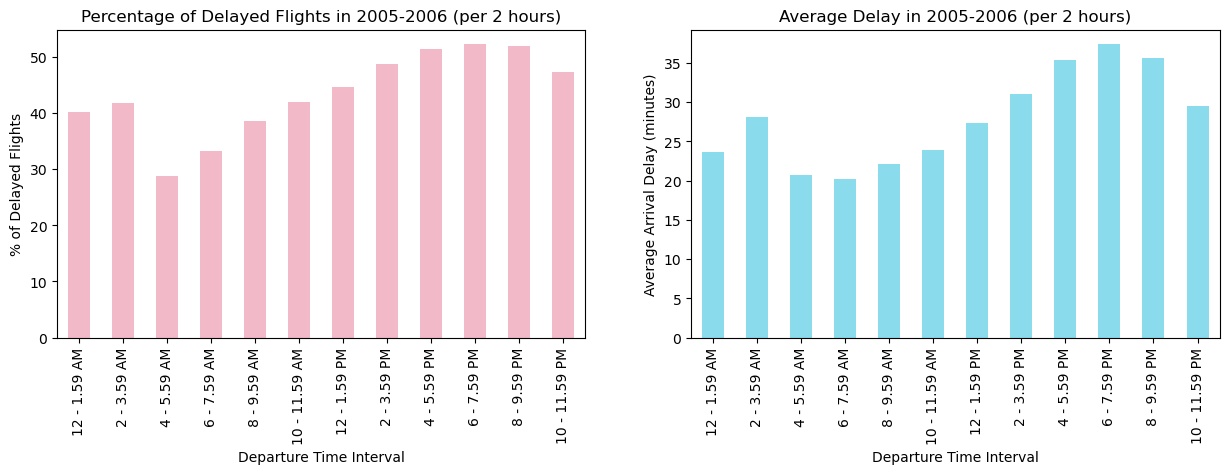

In [12]:
# Create two plots for analyzing the best time of day

fig, ax = plt.subplots(1, 2, figsize = (15,4))

# Create a plot for percentage of delayed flights
best_time_of_day[["Time Interval", "% of Delayed Flights"]].plot.bar(x = "Time Interval", y = "% of Delayed Flights", rot=0, ax = ax[0], legend = False, color="#F2BAC9")
labels = ('12 - 1.59 AM', '2 - 3.59 AM', '4 - 5.59 AM', '6 - 7.59 AM', '8 - 9.59 AM', '10 - 11.59 AM', '12 - 1.59 PM', '2 - 3.59 PM', '4 - 5.59 PM', '6 - 7.59 PM', '8 - 9.59 PM', '10 - 11.59 PM')
ax[0].set_xlabel("Departure Time Interval")
ax[0].set_ylabel("% of Delayed Flights")
ax[0].set_xticklabels(labels, rotation=90)
ax[0].title.set_text("Percentage of Delayed Flights in 2005-2006 (per 2 hours)")

# Create a plot for average delay
best_time_of_day[["Time Interval", "Average Arrival Delay"]].plot.bar(x = "Time Interval", y = "Average Arrival Delay", rot=0, ax = ax[1], legend = False, color="#8ADBEB")
labels = ('12 - 1.59 AM', '2 - 3.59 AM', '4 - 5.59 AM', '6 - 7.59 AM', '8 - 9.59 AM', '10 - 11.59 AM', '12 - 1.59 PM', '2 - 3.59 PM', '4 - 5.59 PM', '6 - 7.59 PM', '8 - 9.59 PM', '10 - 11.59 PM')
ax[1].set_xlabel("Departure Time Interval")
ax[1].set_ylabel("Average Arrival Delay (minutes)")
ax[1].set_xticklabels(labels, rotation=90)
ax[1].title.set_text("Average Delay in 2005-2006 (per 2 hours)")

plt.show()

### Best Day of The Week

In [13]:
# Analyzing the percentage of total delayed flights per day

best_day_of_week_count = flights.groupby("DayOfWeek").agg(
    delayed_flights=("ArrDelay", lambda x: (x > 0).sum()),  # count number of delayed flights i.e. ArrDelay>0
    total_flights=("ArrDelay", "count")  # count total number of flights
)
best_day_of_week_count["percentage_of_delayed_flights"] = (best_day_of_week_count["delayed_flights"] / best_day_of_week_count["total_flights"]) * 100
best_day_of_week_count = best_day_of_week_count.rename(columns={"percentage_of_delayed_flights": "% of delayed flights"})
best_day_of_week_count

,delayed_flights,total_flights,% of delayed flights
DayOfWeek,,,
1,922217,2054543,44.886722
2,845499,2027363,41.704372
3,899500,2041615,44.058258
4,1001179,2054472,48.731694
5,1026776,2064232,49.741308
6,699734,1787020,39.156473
7,865683,1967395,44.001484


In [14]:
# Analyzing the average of delay per day

best_day_of_week_mean = flights[flights["ArrDelay"] > 0].groupby("DayOfWeek").agg({"ArrDelay" : "mean"}).reset_index()
best_day_of_week_mean = best_day_of_week_mean.rename(columns={"ArrDelay" : 'average arrdelay'})
best_day_of_week_mean

,DayOfWeek,average arrdelay
0,1,30.062042
1,2,27.217039
2,3,29.462405
3,4,31.261316
4,5,31.014429
5,6,26.601290
6,7,29.018074


In [15]:
# Combine two DataFrames

best_day_of_week = pd.merge(best_day_of_week_count, best_day_of_week_mean, on="DayOfWeek")
best_day_of_week.columns = ['Day of Week', 'Total Delayed Flights', 'Total Flights', '% of Delayed Flights', 'Average Arrival Delay']
best_day_of_week

,Day of Week,Total Delayed Flights,Total Flights,% of Delayed Flights,Average Arrival Delay
0,1,922217,2054543,44.886722,30.062042
1,2,845499,2027363,41.704372,27.217039
2,3,899500,2041615,44.058258,29.462405
3,4,1001179,2054472,48.731694,31.261316
4,5,1026776,2064232,49.741308,31.014429
5,6,699734,1787020,39.156473,26.601290
6,7,865683,1967395,44.001484,29.018074


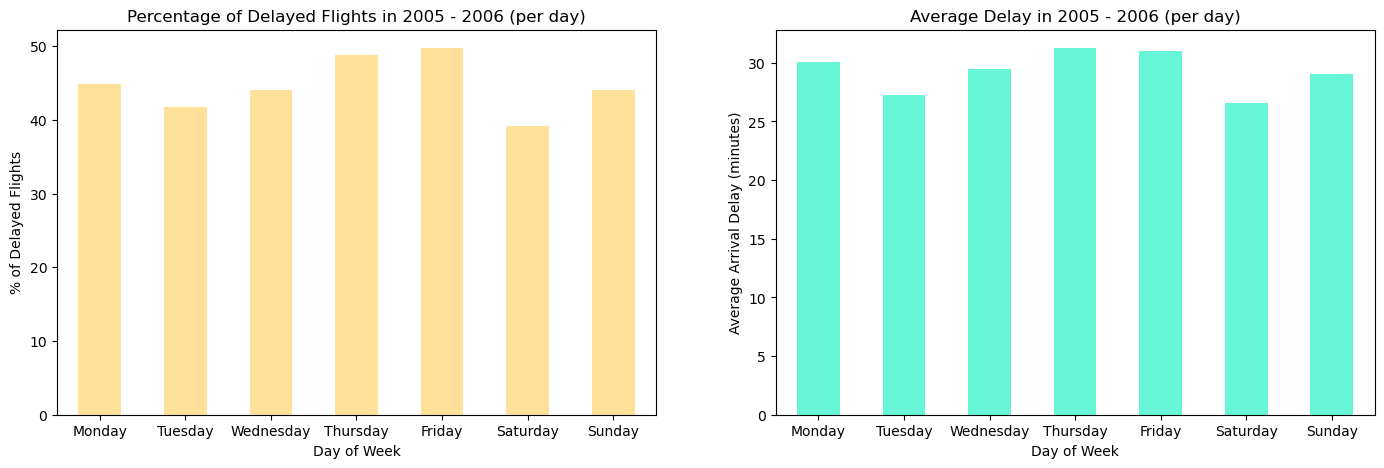

In [16]:
# Create two plots for analyzing the best day of week

fig, ax = plt.subplots(1, 2, figsize = (17,5))

# Create a plot for percentage of delayed flights
best_day_of_week[["Day of Week", "% of Delayed Flights"]].plot.bar(x = "Day of Week", y = "% of Delayed Flights", rot=0, ax = ax[0], legend = False, color="#FFE199")
labels = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
ax[0].set_xlabel("Day of Week")
ax[0].set_ylabel("% of Delayed Flights")
ax[0].set_xticklabels(labels)
ax[0].title.set_text("Percentage of Delayed Flights in 2005 - 2006 (per day)")

# Create a plot for average delay
best_day_of_week[["Day of Week", "Average Arrival Delay"]].plot.bar(x = "Day of Week", y = "Average Arrival Delay", rot=0, ax = ax[1], legend = False, color="#67F5D8")
labels = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
ax[1].set_xlabel("Day of Week")
ax[1].set_ylabel("Average Arrival Delay (minutes)")
ax[1].set_xticklabels(labels)
ax[1].title.set_text("Average Delay in 2005 - 2006 (per day)")

plt.show()

### Best Time of Year

In [17]:
# Analyzing the percentage of total delayed flights per month

best_time_of_year_count = flights.groupby("Month").agg(
    delayed_flights=("ArrDelay", lambda x: (x > 0).sum()),  # count number of delayed flights i.e. ArrDelay>0
    total_flights=("ArrDelay", "count")  # count total number of flights
)
best_time_of_year_count["percentage_of_delayed_flights"] = (best_time_of_year_count["delayed_flights"] / best_time_of_year_count["total_flights"]) * 100
best_time_of_year_count = best_time_of_year_count.rename(columns={"percentage_of_delayed_flights": "% of delayed flights"})
best_time_of_year_count

,delayed_flights,total_flights,% of delayed flights
Month,,,
1,507750,1138161,44.611439
2,467610,1053604,44.381950
3,546180,1203067,45.398968
4,470432,1163897,40.418697
5,484698,1202672,40.301761
6,565020,1184274,47.710243
7,592998,1220738,48.577008
8,557897,1233022,45.246314
9,465023,1135655,40.947559


In [18]:
# Analyzing the average of delay per month

best_time_of_year_mean = flights[flights["ArrDelay"] > 0].groupby("Month").agg({"ArrDelay" : "mean"}).reset_index()
best_time_of_year_mean = best_time_of_year_mean.rename(columns={"ArrDelay" : 'average arrdelay'})
best_time_of_year_mean

,Month,average arrdelay
0,1,29.780414
1,2,27.704382
2,3,28.633225
3,4,25.293902
4,5,26.085571
5,6,32.588641
6,7,35.326623
7,8,30.434247
8,9,27.191315
9,10,28.426961


In [19]:
# Combine two DataFrames

best_time_of_year = pd.merge(best_time_of_year_count, best_time_of_year_mean, on="Month")
best_time_of_year.columns = ['Month', 'Total Delayed Flights', 'Total Flights', '% of Delayed Flights', 'Average Arrival Delay']
best_time_of_year

,Month,Total Delayed Flights,Total Flights,% of Delayed Flights,Average Arrival Delay
0,1,507750,1138161,44.611439,29.780414
1,2,467610,1053604,44.381950,27.704382
2,3,546180,1203067,45.398968,28.633225
3,4,470432,1163897,40.418697,25.293902
4,5,484698,1202672,40.301761,26.085571
5,6,565020,1184274,47.710243,32.588641
6,7,592998,1220738,48.577008,35.326623
7,8,557897,1233022,45.246314,30.434247
8,9,465023,1135655,40.947559,27.191315
9,10,530693,1180599,44.951165,28.426961


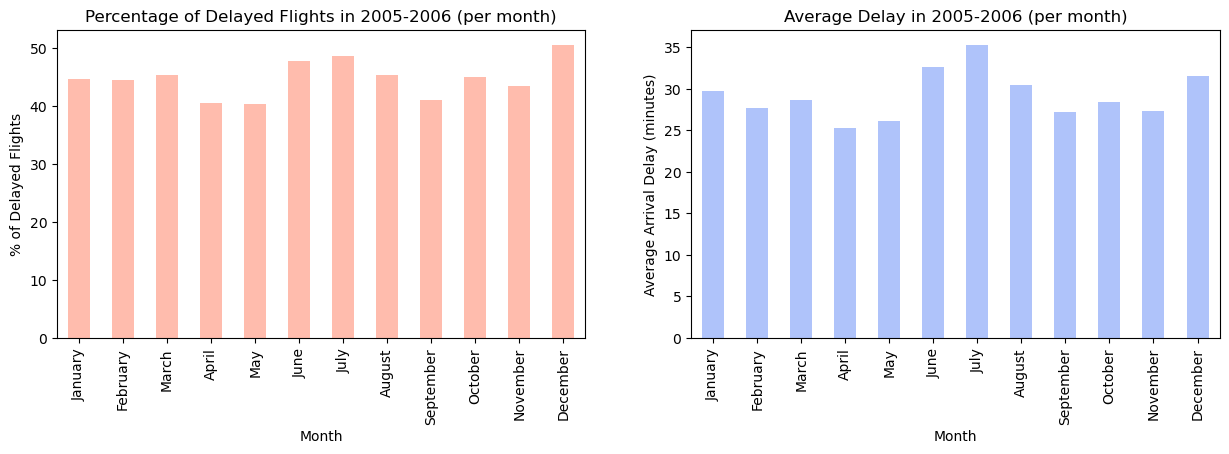

In [20]:
# Create two plots for analyzing the best time of year

fig, ax = plt.subplots(1, 2, figsize = (15,4))

# Create a plot for percentage of delayed flights
best_time_of_year[["Month", "% of Delayed Flights"]].plot.bar(x = "Month", y = "% of Delayed Flights", rot=0, ax = ax[0], legend = False, color="#FFBCAD")
labels = ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December')
ax[0].set_xlabel("Month")
ax[0].set_ylabel("% of Delayed Flights")
ax[0].set_xticklabels(labels, rotation=90)
ax[0].title.set_text("Percentage of Delayed Flights in 2005-2006 (per month)")

# Create a plot for average delay
best_time_of_year[["Month", "Average Arrival Delay"]].plot.bar(x = "Month", y = "Average Arrival Delay", rot=0, ax = ax[1], legend = False, color="#AFC3FA")
labels = ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December')
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Average Arrival Delay (minutes)")
ax[1].set_xticklabels(labels, rotation=90)
ax[1].title.set_text("Average Delay in 2005-2006 (per month)")

plt.show()